# Real-world Data Wrangling

## 1. Gather data



### **1.1.** Problem Statement
The goal is to analyze the relationship between self-employment income and wage or salary income across various households. Specifically, we aim to explore the distribution of these income types and identify any patterns or differences between them.

### 1.2. Import Libraries

In [1]:
import pandas as pd
import urllib.request
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

### 1.3. Load Datasets
#### **Dataset 1**:Self-Employment Income

 #####   Type: CSV File
 #####   Method: The data was gathered using the "Downloading files" method from the UCI Machine Learning Repository.
 #####  Dataset variables:
  * SERIALNO: Household serial number
  * PUMA: Public use microdata area code
  * PINCP: Total person's income (past 12 months)

In [2]:
# Load self-employment income dataset
SelfEmploymentIncome=pd.read_csv('self-employment-income-in-the-past-12-months-for-households.csv')

In [3]:
# Display the first few rows to inspect the data
SelfEmploymentIncome.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With self-employment income,Margin of Error; Total: - With self-employment income,Estimate; Total: - No self-employment income,Margin of Error; Total: - No self-employment income
0,Allegheny Center,1,870.0,93.000000,36.0,25.000000,834.0,88.000000
1,Allegheny West,2,146.0,36.000000,22.0,20.000000,124.0,34.000000
2,Allentown,3,1069.0,132.457540,12.0,23.685439,1057.0,132.457540
3,Arlington,4,701.0,104.465305,28.0,26.286879,673.0,105.531986
4,Arlington Heights,5,144.0,59.000000,0.0,10.000000,144.0,59.000000


#### Dataset 2: Wage or Salary Income

##### Type: CSV File
#####  Method: The data was gathered using the "Downloading files" method from the Western Pennsylvania Regional Data Center.
#####  Dataset variables:
 * SERIALNO: Household serial number
 * PUMA: Public use microdata area code
 * WAGP: Wage or salary income (past 12 months)

In [4]:
# Load wage or salary income dataset from the given URL
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/d159c6b3-f70a-439b-bd2b-0cb8735d76d4/download/wage-or-salary-income-in-the-past-12-months-for-households.csv"
SalaryIncome = pd.read_csv(url)

In [5]:
# Display the first few rows to inspect the data
SalaryIncome.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
1,Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
2,Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
3,Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
4,Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000


## 2. Assess data



### 2.1. Quality Issue 1: Missing Values


In [22]:
# Check for missing values in SelfEmploymentIncome Dataset 
missing_values_SelfEmploymentIncome = SelfEmploymentIncome.isnull().sum()
print("Missing values in Self Employment Income:")
missing_values_SelfEmploymentIncome

Missing values in Self Employment Income:


Neighborhood                                             0
Id                                                       0
Estimate; Total:                                         0
Margin of Error; Total:                                  0
Estimate; Total: - With self-employment income           0
Margin of Error; Total: - With self-employment income    0
Estimate; Total: - No self-employment income             0
Margin of Error; Total: - No self-employment income      0
dtype: int64

In [23]:
# Check for missing values in SalaryIncome Dataset
missing_values_SalaryIncome = SalaryIncome.isnull().sum()
print("Missing values in Salary Income:")
missing_values_SalaryIncome

Missing values in Salary Income:


Neighborhood                                            0
Id                                                      0
Estimate; Total:                                        0
Margin of Error; Total:                                 0
Estimate; Total: - With wage or salary income           0
Margin of Error; Total: - With wage or salary income    0
Estimate; Total: - No wage or salary income             0
Margin of Error; Total: - No wage or salary income      0
dtype: int64

##### Justification: We use isnull() and sum() methods to calculate the total number of missing values in each column. This helps identify whether the dataset has completeness issues.

### 2.2. Quality Issue 2: : Inaccurate Data

##### Description: Inaccurate data refers to inconsistencies or errors in the dataset. For instance, some columns may have values that are far outside the expected range.

In [25]:
# Check summary statistics of SelfEmploymentIncome and SalaryIncome datasets
print("Summary statistics for SelfEmploymentIncome:")
SelfEmploymentIncome.describe()

Summary statistics for SelfEmploymentIncome:


,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With self-employment income,Margin of Error; Total: - With self-employment income,Estimate; Total: - No self-employment income,Margin of Error; Total: - No self-employment income
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,46.00000,1471.791209,130.292002,112.703297,48.282161,1359.087912,131.453431
std,26.41338,1451.294101,76.774451,159.418073,36.201105,1315.260926,77.120871
min,1.00000,3.000000,3.000000,0.000000,10.000000,3.000000,3.000000
25%,23.50000,513.500000,65.905592,22.000000,21.736103,478.000000,69.503333
50%,46.00000,1082.000000,125.207827,66.000000,39.000000,1057.000000,125.379424
75%,68.50000,1886.500000,168.540225,129.500000,67.072593,1752.500000,166.653825
max,91.00000,7484.000000,360.919659,1021.000000,203.985294,6967.000000,356.133402


In [26]:
print("Summary statistics for SalaryIncome:")
SalaryIncome.describe()

Summary statistics for SalaryIncome:


,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1471.791209,130.292002,1069.472527,124.761630,402.318681,87.757095
std,1451.294101,76.774451,1119.947046,74.340788,365.453048,50.452397
min,3.000000,3.000000,0.000000,9.000000,0.000000,3.000000
25%,513.500000,65.905592,343.000000,62.500000,129.000000,44.099779
50%,1082.000000,125.207827,729.000000,115.866302,333.000000,88.566359
75%,1886.500000,168.540225,1276.000000,159.278478,525.000000,120.612971
max,7484.000000,360.919659,6134.000000,363.641307,2212.000000,249.801922


##### Justification: describe() helps us detect outliers by providing statistics like mean, min, and max values. Any unusually high or low values could indicate inaccuracies or outliers in the data.

### 2.3. Tidiness Issue 1: Redundant Columns


In [27]:
# Identify and list redundant columns
redundant_columns_SelfEmploymentIncome = ['SERIALNO', 'PUMA']
print("Redundant columns in Self Employment Income:", redundant_columns_SelfEmploymentIncome)


Redundant columns in Self Employment Income: ['SERIALNO', 'PUMA']


In [28]:
redundant_columns_SalaryIncome = ['SERIALNO', 'PUMA']
print("Redundant columns in Salary Income:", redundant_columns_SalaryIncome)

Redundant columns in Salary Income: ['SERIALNO', 'PUMA']


##### Justification: These columns are irrelevant for the specific research question and can be safely dropped to make the dataset more manageable and focused.

### 2.4. Tidiness Issue 2: Inconsistent Data Types


##### Description: Columns should maintain consistent data types. For example, numerical data should not be stored as strings. We need to ensure that data types across columns are consistent.

In [29]:
# Check data types of both datasets
print("Data types in Self Employment Income:")
SelfEmploymentIncome.dtypes


Data types in Self Employment Income:


Neighborhood                                              object
Id                                                         int64
Estimate; Total:                                         float64
Margin of Error; Total:                                  float64
Estimate; Total: - With self-employment income           float64
Margin of Error; Total: - With self-employment income    float64
Estimate; Total: - No self-employment income             float64
Margin of Error; Total: - No self-employment income      float64
dtype: object

In [30]:
print("Data types in Salary Income:")
SalaryIncome.dtypes

Data types in Salary Income:


Neighborhood                                             object
Id                                                       object
Estimate; Total:                                        float64
Margin of Error; Total:                                 float64
Estimate; Total: - With wage or salary income           float64
Margin of Error; Total: - With wage or salary income    float64
Estimate; Total: - No wage or salary income             float64
Margin of Error; Total: - No wage or salary income      float64
dtype: object

##### Justification: Using dtypes, we can inspect whether numeric columns are stored as such, and if any string representations of numbers exist, they should be converted to numeric types for appropriate analysis.

## 3. Clean data


* Cleaning Strategy
* Handle Missing Values
* Ensure Correct Data Types
* Rename Columns for Consistency
* Remove Duplicate Rows


### 3.1. Handle Missing Values

In [14]:
# Select numeric columns
numeric_columns = SelfEmploymentIncome.select_dtypes(include='number').columns

# Calculate mean for numeric columns
mean_values = SelfEmploymentIncome[numeric_columns].mean()

# Fill missing values in numeric columns with their respective means
SelfEmploymentIncome_cleaned = SelfEmploymentIncome.copy()
SelfEmploymentIncome_cleaned[numeric_columns] = SelfEmploymentIncome_cleaned[numeric_columns].fillna(mean_values)

# Fill NaNs with Mean Values for All Columns
for col in SelfEmploymentIncome.columns:
    if pd.api.types.is_numeric_dtype(SelfEmploymentIncome[col]):
        SelfEmploymentIncome[col].fillna(SelfEmploymentIncome[col].mean(), inplace=True)
    else:

        SelfEmploymentIncome[col].fillna('Unknown', inplace=True)  # filling non-numeric with 'Unknown'

# SelfEmploymentIncome is now cleaned
SelfEmploymentIncome_cleaned = SelfEmploymentIncome

# Fill missing values in numeric columns of SalaryIncome with their means
numeric_columns = SalaryIncome.select_dtypes(include='number').columns
mean_values = SalaryIncome[numeric_columns].mean()
SalaryIncome[numeric_columns] = SalaryIncome[numeric_columns].fillna(mean_values)

# Convert 'Id' column to string
SalaryIncome['Id'] = SalaryIncome['Id'].astype(str)

# Display the cleaned dataframe
print("\nCleaned DataFrame Salary Income:")
SalaryIncome


Cleaned DataFrame Salary Income:


,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With wage or salary income,Margin of Error; Total: - With wage or salary income,Estimate; Total: - No wage or salary income,Margin of Error; Total: - No wage or salary income
0,Allegheny Center,1,870.0,93.000000,635.0,91.000000,235.0,59.000000
1,Allegheny West,2,146.0,36.000000,119.0,35.000000,27.0,20.000000
2,Allentown,3,1069.0,132.457540,736.0,140.335313,333.0,97.493590
3,Arlington,4,701.0,104.465305,570.0,106.273233,131.0,45.199558
4,Arlington Heights,5,144.0,59.000000,99.0,60.000000,45.0,30.000000
...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,1287.0,137.091211,998.0,141.322327,289.0,92.330927
87,West End,88,99.0,47.000000,81.0,49.000000,18.0,16.000000
88,West Oakland,89,630.0,79.611557,334.0,64.660653,296.0,66.241981
89,Westwood,90,1492.0,112.538882,1189.0,120.507261,303.0,81.565924


### 3.2. Handle Data Types

In [15]:
# Check for 'SERIALNO' in both dataframes
if 'SERIALNO' in SalaryIncome.columns:
    SalaryIncome['SERIALNO'] = SalaryIncome['SERIALNO'].astype(str)
    
if 'SERIALNO' in SelfEmploymentIncome.columns:
    SelfEmploymentIncome['SERIALNO'] = SelfEmploymentIncome['SERIALNO'].astype(str)

### 3.3. Remove Redundant Columns

In [16]:
# Verify the columns in SelfEmploymentIncome_cleaned
print("Columns in SelfEmploymentIncome_cleaned:")
print(SelfEmploymentIncome_cleaned.columns)

# Remove redundant columns only if they exist in the dataframe
redundant_columns_SelfEmploymentIncome = ['SERIALNO', 'PUMA']
columns_to_drop = [col for col in redundant_columns_SelfEmploymentIncome if col in SelfEmploymentIncome_cleaned.columns]

# Drop the columns
if columns_to_drop:
    SelfEmploymentIncome_cleaned.drop(columns=columns_to_drop, inplace=True)
else:
    print("No redundant columns found in SelfEmploymentIncome_cleaned")

Columns in SelfEmploymentIncome_cleaned:
Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - With self-employment income',
       'Margin of Error; Total: - With self-employment income',
       'Estimate; Total: - No self-employment income',
       'Margin of Error; Total: - No self-employment income'],
      dtype='object')
No redundant columns found in SelfEmploymentIncome_cleaned


In [17]:
# Display the cleaned dataframe
print("Cleaned DataFrame SelfEmploymentIncome_cleaned:")
SelfEmploymentIncome_cleaned

Cleaned DataFrame SelfEmploymentIncome_cleaned:


,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With self-employment income,Margin of Error; Total: - With self-employment income,Estimate; Total: - No self-employment income,Margin of Error; Total: - No self-employment income
0,Allegheny Center,1,870.0,93.000000,36.0,25.000000,834.0,88.000000
1,Allegheny West,2,146.0,36.000000,22.0,20.000000,124.0,34.000000
2,Allentown,3,1069.0,132.457540,12.0,23.685439,1057.0,132.457540
3,Arlington,4,701.0,104.465305,28.0,26.286879,673.0,105.531986
4,Arlington Heights,5,144.0,59.000000,0.0,10.000000,144.0,59.000000
...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,1287.0,137.091211,132.0,77.239886,1155.0,134.484200
87,West End,88,99.0,47.000000,14.0,21.000000,85.0,47.000000
88,West Oakland,89,630.0,79.611557,12.0,15.620499,618.0,78.771822
89,Westwood,90,1492.0,112.538882,86.0,55.470713,1406.0,113.145923


### 3.4. Ensure Data Structure

In [18]:
# Ensure the structure is appropriate
SelfEmploymentIncome_cleaned.shape
SalaryIncome.shape

(91, 8)

## 4. Update your data store


In [19]:
# Save cleaned datasets to CSV files
SelfEmploymentIncome_cleaned.to_csv('SelfEmploymentIncome_cleaned.csv', index=False)
SalaryIncome.to_csv('salary_income_cleaned.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

#### Calculate the average income across both datasets

In [20]:
# Calculate mean of 'Estimate; Total: - With self-employment income' and 'Estimate; Total: - With wage or salary income'
avg_self_employment_income = SelfEmploymentIncome_cleaned['Estimate; Total: - With self-employment income'].mean()
avg_salary_income = SalaryIncome['Estimate; Total: - With wage or salary income'].mean()

print(f"Average Self Employment Income: {avg_self_employment_income:.2f}")
print(f"Average Salary Income: {avg_salary_income:.2f}")

Average Self Employment Income: 112.70
Average Salary Income: 1069.47


### 5.2. Generate Visualizations

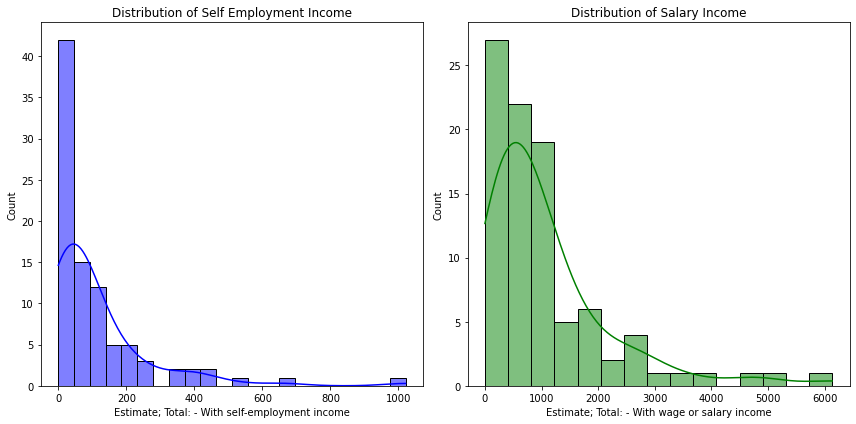

In [21]:
# Plot the distributions of income
plt.figure(figsize=(12, 6))

# Distribution of self-employment income
plt.subplot(1, 2, 1)
sns.histplot(SelfEmploymentIncome_cleaned['Estimate; Total: - With self-employment income'], kde=True, color='blue')
plt.title('Distribution of Self Employment Income')

# Distribution of salary income
plt.subplot(1, 2, 2)
sns.histplot(SalaryIncome['Estimate; Total: - With wage or salary income'], kde=True, color='green')
plt.title('Distribution of Salary Income')

plt.tight_layout()
plt.show()

##### Findings from the Visualizations
* Self-Employment Income Distribution: The distribution is heavily right-skewed, with most households earning low amounts from self-employment. A few households report significantly higher earnings, but these are outliers.

* Salary Income Distribution: Similarly, salary income is also skewed, but a larger portion of the population earns relatively higher amounts compared to self-employment income. This indicates that salary income is generally more consistent and higher than self-employment income.

###### Conclusion: The visualizations indicate that salary income tends to be higher and less variable than self-employment income. This suggests that individuals relying solely on self-employment may have more volatile earnings.

### **5.2:** Reflection
If I had more time to finish the analysis, I would investigate the connections between various forms of income and other socioeconomic traits. Furthermore, greater insights into income patterns and their implications could be obtained by more comprehensive data cleansing and sophisticated statistical techniques.
